# SVD and PseudoInverses

[SVD notes link for 16B SVD](https://inst.eecs.berkeley.edu/~ee16b/su20/notes/su20/note17.pdf)

[Link to useful sources](https://www.section.io/engineering-education/moore-penrose-pseudoinverse/)

Suppose we have a system of linear equations, Ax=b where the rectangular matrix A and vector b are known, and vector x is unknown.

To solve this system, we need to find the values for the vector x. In this case, A has no inverse, but we can approximate it using Singular Value Decomposition. We know, the SVD of a matrix,
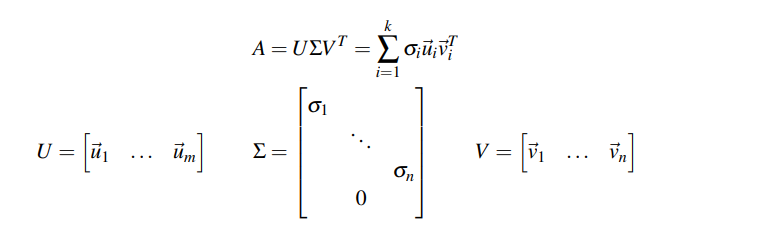

In the given system, we can replace matrix A with its SVD, i.e.,

\\[Ax = b\\]

\\[UΣV^Tx=b\\]

Now, it is much easier to take an inverse of these singular components of A, i.e.,
\\[VΣ^{−1}U^TUΣV^Tx=VΣ^{−1}U^Tb\\]

\\[x =VΣ^{−1}U^Tb\\]

<br>

We denote the quantity A† as,
\\[A^†=VΣ^{−1}U^T\\]
This gives:


\\[x =A^†b\\]
The quantity A† is what we call the Pseudo-inverse or, more generally, the Moore Penrose Pseudo-inverse of matrix A.

This quantity generalizes the inverse of a matrix, and it exists for any matrix regardless of whether a matrix is square or not.

The A† must satisfy four conditions known as Moore Penrose pseudo-inverse condition. These are: \\[1.AA^†A=A\\] \\[2. A^†AA^†=A^†\\] \\[3. (AA^†)∗=AA^†\\] \\[4. (A^†A)∗=A^†A\\]

#### Pseudoinverse Intuition with scaling and rotations
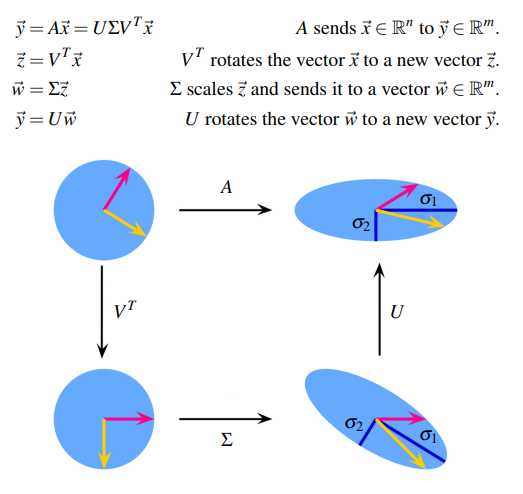

## Python implementation of Moore Penrose Pseudoinverse

In [2]:
import numpy as np

In [3]:
# Say we have some array A
A = np.array([[-1,2],[3,-2],[5,7]])
print(A)

[[-1  2]
 [ 3 -2]
 [ 5  7]]


In [6]:
# Calculating the SVD of A
# note that d is just a list of sigmas retuned in size order.
U,d,VT = np.linalg.svd(A)

[[ 0.12708324  0.47409506  0.87125411]
 [ 0.00164602 -0.87847553  0.47778451]
 [ 0.99189069 -0.0592843  -0.11241989]]


In [7]:
# We'll need to put them into the right form, a Diagonalized Matrix
D  =  np.diag(d)
print(D)

[[8.66918448 0.        ]
 [0.         4.10429538]]


In [8]:
# Then, find the inverse.
D_inver = np.linalg.inv(D)
print(D_inver)

[[0.1153511  0.        ]
 [0.         0.24364718]]


In [9]:
# Since U have 3 rows, we have to pad the inverse of D accordingly.
Dplus = np.concatenate((D_inver, np.array([[0,0]]).T),axis = 1)
print(Dplus)

[[0.1153511  0.         0.        ]
 [0.         0.24364718 0.        ]]


We know, \\[A^†=VD^†U^T\\] and from our singular value decomposition we got U and VT, we can now compute our Pseudo-inverse A† as follows.

In [10]:
Aplus = np.dot(VT.T, np.dot(Dplus,U.T))
print(Aplus)

[[-0.08767773  0.17772512  0.07582938]
 [ 0.07661927 -0.1192733   0.08688784]]


In [11]:
# will this provide us with an identity matrix??
np.dot(Aplus, A)

array([[ 1.00000000e+00, -2.22044605e-16],
       [-5.55111512e-17,  1.00000000e+00]])

Unfortunately, it is time-consuming to perform all these steps one by one Hence, use Numpy's np.pinv

In [12]:
np.linalg.pinv(A)

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])